<a href="https://colab.research.google.com/github/OnzyBoy/ai_job_impact_2030/blob/main/ai_job_impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI Impact on Jobs 2030

Data Source: [Kaggle Link](https://www.kaggle.com/datasets/khushikyad001/ai-impact-on-jobs-2030)

Features:

*   Job Title
*   Average Salary (USD)
*   Years Experience
*   Education Level

*   AI Exposure Index - How much the job interacts with AI tools (0 = no exposure, 1 = highly AI-dependent)
*   Tech Growth Factor - Multiplier representing how quickly technology is advancing in the field.
*   Automation Probability 2030 - Estimated probability that the job will be automated by 2030.

*   Risk Category - Categorized automation risk: “Low”, “Medium”, or “High”.

* Skill 1 - Skill 10 - Randomized skill proficiency levels representing 10 different skill dimensions (e.g., creativity, data analysis)



## Imports

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

##Data Exploration


In [2]:
df = pd.read_csv("job_.csv")
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [4]:
# Check for missing values
df.isna().sum()

,0
Job_Title,0
Average_Salary,0
Years_Experience,0
Education_Level,0
AI_Exposure_Index,0
Tech_Growth_Factor,0
Automation_Probability_2030,0
Risk_Category,0
Skill_1,0
Skill_2,0


## EDA

### Numerical Features

In [5]:
num_features = ['Average_Salary','Years_Experience','AI_Exposure_Index','Tech_Growth_Factor','Automation_Probability_2030']

df[num_features].describe()


,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503
std,34608.088767,8.739788,0.284004,0.287669,0.247881
min,30030.000000,0.000000,0.000000,0.500000,0.050000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000
max,149798.000000,29.000000,1.000000,1.500000,0.950000


#### Plot


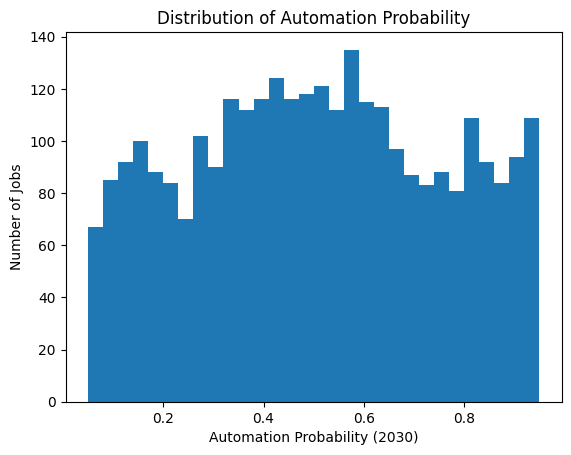

In [6]:
plt.hist(df['Automation_Probability_2030'], bins = 30)
plt.xlabel('Automation Probability (2030)')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Automation Probability')
plt.show()

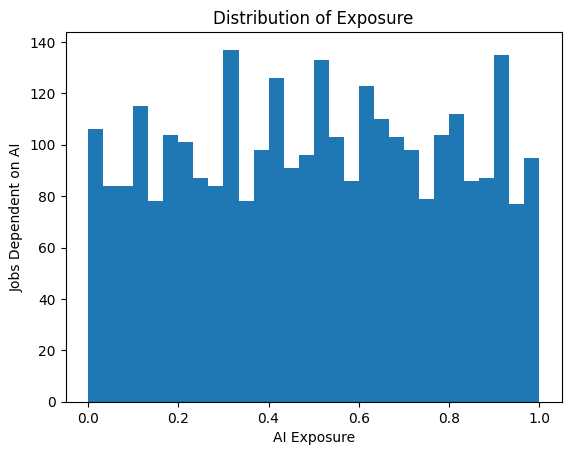

In [7]:
plt.hist(df['AI_Exposure_Index'], bins = 30)
plt.xlabel('AI Exposure')
plt.ylabel('Jobs Dependent on AI')
plt.title('Distribution of Exposure')
plt.show()

### Categorical Features

In [8]:
df['Risk_Category'].value_counts()


,count
Risk_Category,
Medium,1521
High,740
Low,739


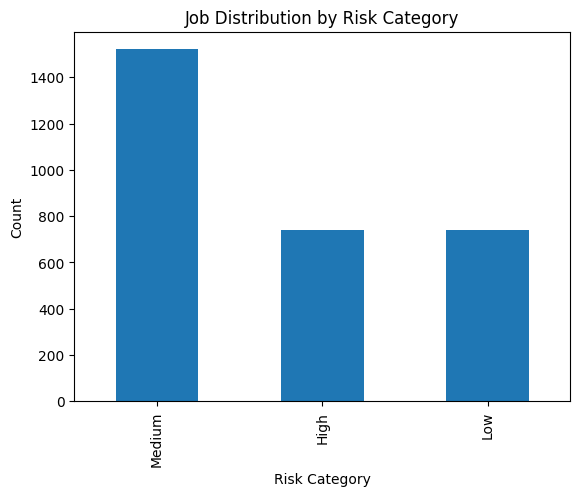

In [9]:
df['Risk_Category'].value_counts().plot(kind='bar')
plt.title('Job Distribution by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()


In [10]:
df['Education_Level'].value_counts()

,count
Education_Level,
High School,784
Bachelor's,765
Master's,735
PhD,716


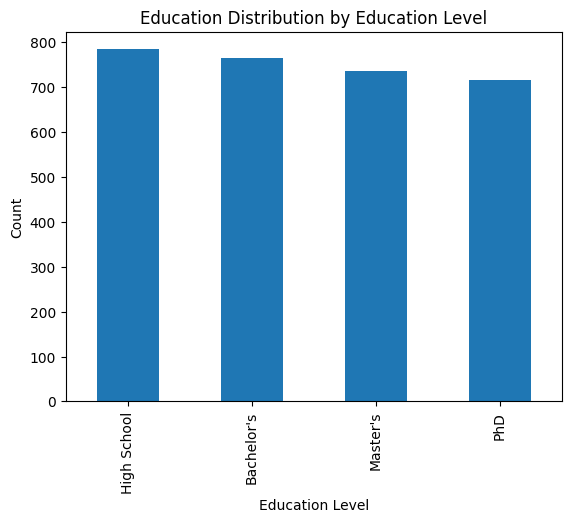

In [11]:
df['Education_Level'].value_counts().plot(kind='bar')
plt.title('Education Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


In [12]:
df['Job_Title'].value_counts()

,count
Job_Title,
Software Engineer,175
UX Researcher,167
Data Scientist,167
Teacher,166
Graphic Designer,160
HR Specialist,157
Construction Worker,156
Retail Worker,155
Security Guard,154


### Categorical Features vs Numerical Features

In [13]:
df.groupby('Risk_Category')['Average_Salary'].mean().sort_values()


,Average_Salary
Risk_Category,
High,87359.441892
Low,89166.776725
Medium,90451.414859


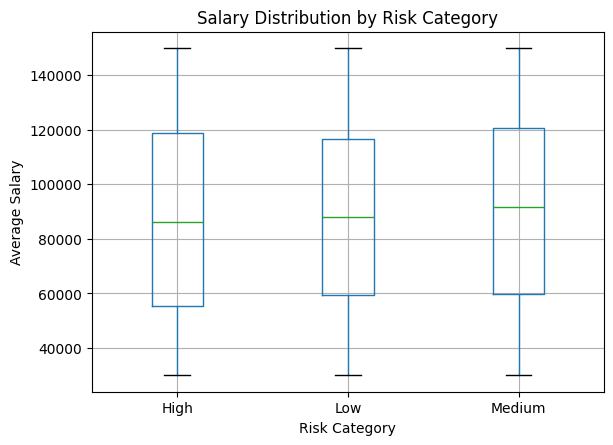

In [14]:
df.boxplot(column='Average_Salary', by='Risk_Category')
plt.title('Salary Distribution by Risk Category')
plt.suptitle('')
plt.xlabel('Risk Category')
plt.ylabel('Average Salary')
plt.show()


In [15]:
df.groupby('Education_Level')['Automation_Probability_2030'].mean().sort_values()


,Automation_Probability_2030
Education_Level,
Master's,0.495633
Bachelor's,0.500353
PhD,0.500489
High School,0.509056


In [16]:
df.groupby('Risk_Category')['Tech_Growth_Factor'].mean()


,Tech_Growth_Factor
Risk_Category,
High,0.999811
Low,0.981231
Medium,1.000026


### Numerical Features vs Numerical Features

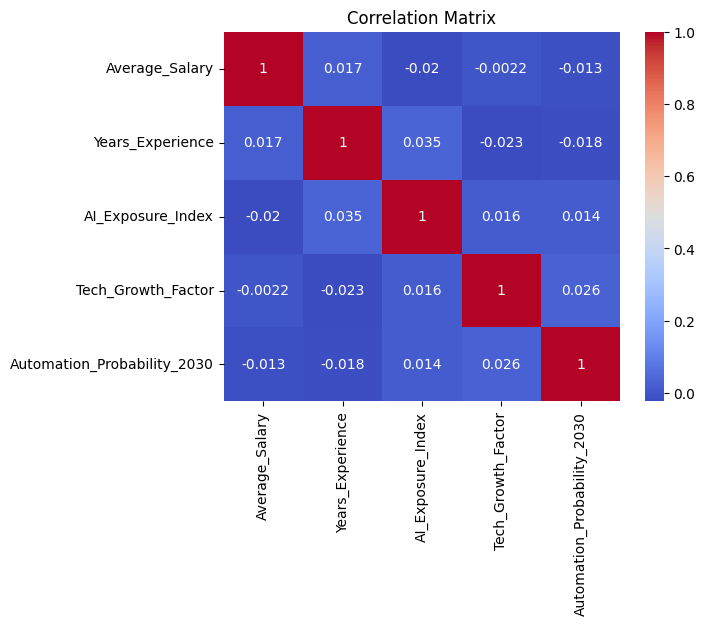

In [17]:
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

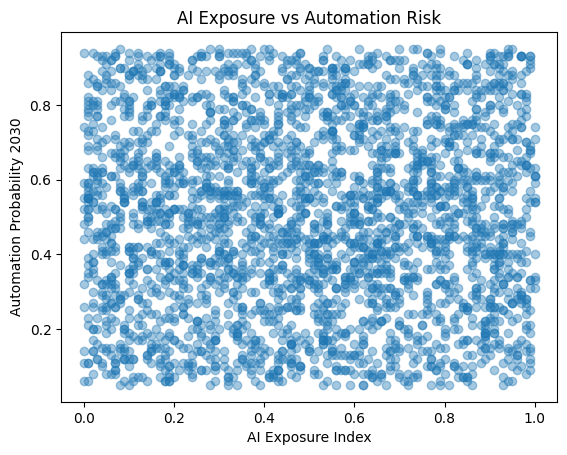

In [18]:
plt.scatter(df['AI_Exposure_Index'], df['Automation_Probability_2030'], alpha=0.4)
plt.xlabel('AI Exposure Index')
plt.ylabel('Automation Probability 2030')
plt.title('AI Exposure vs Automation Risk')
plt.show()


## Classification Modelling

### Logistic Regression [Baseline]

Predicting Risk Category using Average Salary, Years of Experience, AI Exposure Index, Tech Growth Factor and Education Level.

Values need to be numeric

In [19]:
y = df['Risk_Category']
X = df[['Average_Salary','Years_Experience','AI_Exposure_Index','Tech_Growth_Factor','Education_Level']]

In [20]:
#Encoding the Categorical Variable
X_encoded = pd.get_dummies(X, columns=['Education_Level'], drop_first=True)

In [21]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
#Train Logistic Regression Model
log_model = LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    solver='lbfgs'
)

log_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [24]:
#Evaluate Model
y_pred = log_model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5066666666666667

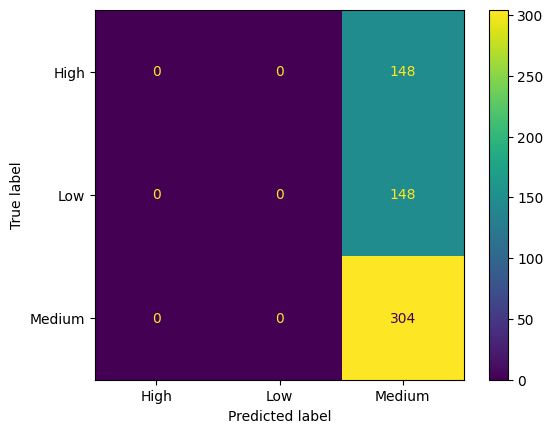

In [25]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_model.classes_)
disp.plot()
plt.show()

In [26]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00       148
         Low       0.00      0.00      0.00       148
      Medium       0.51      1.00      0.67       304

    accuracy                           0.51       600
   macro avg       0.17      0.33      0.22       600
weighted avg       0.26      0.51      0.34       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
coef_df = pd.DataFrame(
    log_model.coef_,
    columns=X_encoded.columns,
    index=log_model.classes_
)

coef_df

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Education_Level_High School,Education_Level_Master's,Education_Level_PhD
High,-0.053031,-0.017382,0.023278,0.045893,-0.040806,-0.004477,-0.042264
Low,0.015332,0.017876,-0.027707,-0.059681,-0.012834,0.002270,0.030543
Medium,0.037699,-0.000495,0.004430,0.013788,0.053640,0.002207,0.011721


### Decision Tree Model - 20 questions

In [28]:
# Split data into test and train data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


In [29]:
# Small Decision Tree
tree_model = DecisionTreeClassifier(
    max_depth=5, #5 questions Max
    min_samples_split=20, # don’t split tiny groups
    random_state=42
)

In [30]:
#Training the tree
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)

In [31]:
#Making Predictions
y_pred_tree = tree_model.predict(X_test)

In [32]:
#Evaluate the tree
accuracy_score(y_test, y_pred_tree)

0.48833333333333334

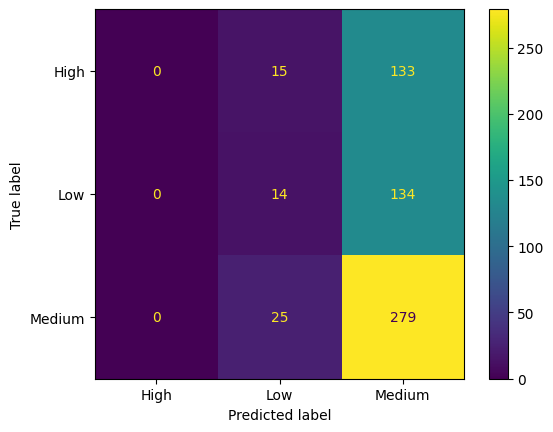

In [33]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tree, labels=tree_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree_model.classes_)
disp.plot()
plt.show()

In [34]:
# Report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00       148
         Low       0.26      0.09      0.14       148
      Medium       0.51      0.92      0.66       304

    accuracy                           0.49       600
   macro avg       0.26      0.34      0.27       600
weighted avg       0.32      0.49      0.37       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# What the tree considered as important
feature_importance = pd.Series(
    tree_model.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

feature_importance

,0
AI_Exposure_Index,0.321127
Tech_Growth_Factor,0.255177
Average_Salary,0.211000
Education_Level_High School,0.107590
Years_Experience,0.105107
Education_Level_Master's,0.000000
Education_Level_PhD,0.000000


### Random Forest

In [36]:
X = df[['Average_Salary',
        'Years_Experience',
        'AI_Exposure_Index',
        'Tech_Growth_Factor',
        'Education_Level']]

y = df['Risk_Category']

X_encoded = pd.get_dummies(X, columns=['Education_Level'], drop_first=True)


In [37]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [38]:
# Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=10,           # limit tree depth
    min_samples_split=20,   # avoid tiny splits
    random_state=42,
    class_weight='balanced'  # IMPORTANT for High/Low
)

In [39]:
#Train Model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=20, n_estimators=200, random_state=42)

In [40]:
#Make Predictions
y_pred_rf = rf_model.predict(X_test)

In [41]:
#Accuracy
accuracy_score(y_test, y_pred_rf)

0.37

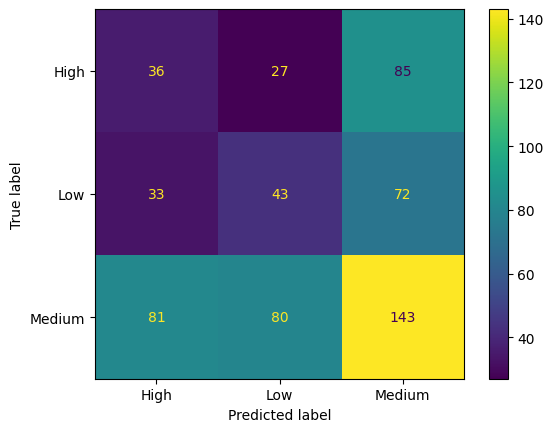

In [42]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_model.classes_)
disp.plot()
plt.show()

In [43]:
#Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

        High       0.24      0.24      0.24       148
         Low       0.29      0.29      0.29       148
      Medium       0.48      0.47      0.47       304

    accuracy                           0.37       600
   macro avg       0.33      0.33      0.33       600
weighted avg       0.37      0.37      0.37       600



In [44]:
#Feature Importance
rf_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

rf_importance

,0
Average_Salary,0.280753
Tech_Growth_Factor,0.235957
AI_Exposure_Index,0.220754
Years_Experience,0.192278
Education_Level_High School,0.026176
Education_Level_Master's,0.023277
Education_Level_PhD,0.020804


## Regression Modelling

### Linear Regression

* Predict how likely a job is to be automated

In [46]:
#Target Variable
y = df['Automation_Probability_2030']

#Feature Variables
features = ['Average_Salary','Years_Experience','AI_Exposure_Index','Tech_Growth_Factor','Education_Level']
X = df[features]

In [47]:
#Encode Education Level
X = pd.get_dummies(X, drop_first=True)
X.head()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Education_Level_High School,Education_Level_Master's,Education_Level_PhD
0,45795,28,0.18,1.28,False,True,False
1,133355,20,0.62,1.11,False,False,True
2,146216,2,0.86,1.18,True,False,False
3,136530,13,0.39,0.68,False,False,True
4,70397,22,0.52,1.46,True,False,False


In [48]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
#Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
#Predictions
y_pred = model.predict(X_test)

In [53]:
#Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.2164367954530504


In [55]:
#Explained Variance - How well did we explain the problem
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: -0.0007699087812513827


In [56]:
#Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df


,Feature,Coefficient
2,AI_Exposure_Index,2.069053e-02
3,Tech_Growth_Factor,1.046854e-02
4,Education_Level_High School,1.008948e-02
0,Average_Salary,-1.110093e-07
1,Years_Experience,-5.929358e-04
6,Education_Level_PhD,-1.380596e-03
5,Education_Level_Master's,-2.478884e-03


### Decision Tree Regressor


In [59]:
X = df[
    ['Average_Salary',
     'Years_Experience',
     'AI_Exposure_Index',
     'Tech_Growth_Factor',
     'Education_Level']
]

y = df['Automation_Probability_2030']

# Encoding
X = pd.get_dummies(X, drop_first=True)


In [60]:
# Train-Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [61]:
#Regressor
dt_reg = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [62]:
#Predictions
y_pred = dt_reg.predict(X_test)

In [63]:
#Evaluate Regressor
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.2212751546138549


In [64]:
#R squared
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: -0.07109789720836668


In [65]:
#Feature Importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
0,Average_Salary,0.402367
2,AI_Exposure_Index,0.342295
1,Years_Experience,0.182696
3,Tech_Growth_Factor,0.044040
5,Education_Level_Master's,0.019121
6,Education_Level_PhD,0.009481
4,Education_Level_High School,0.000000


### Random Forest Regressor

In [67]:
X = df[
    ['Average_Salary',
     'Years_Experience',
     'AI_Exposure_Index',
     'Tech_Growth_Factor',
     'Education_Level']
]

y = df['Automation_Probability_2030']

X = pd.get_dummies(X, drop_first=True)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [69]:
rf_reg = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=8,           # prevent overfitting
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=200, random_state=42)

In [70]:
y_pred = rf_reg.predict(X_test)

In [71]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.2171680289499189


In [73]:
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: -0.011020585022801122


In [74]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
0,Average_Salary,0.340080
2,AI_Exposure_Index,0.221569
3,Tech_Growth_Factor,0.215969
1,Years_Experience,0.163343
5,Education_Level_Master's,0.022868
4,Education_Level_High School,0.019885
6,Education_Level_PhD,0.016287


## Project Report

## Introduction
The objective of this analysis was to explore a dataset on the potential impact of Artificial Intelligence (AI) on jobs by the year 2030 and to assess whether job-related features can reliably predict automation risk. The project follows a full data science workflow: exploratory data analysis (EDA), feature inspection, model building, evaluation, and conclusion

---

## Dataset Overview
The dataset contains 3,000 observations and 18 columns, including:


*   Job characteristics (Job Title, Salary, Experience, Education)
*   AI-related indicators (AI Exposure Index, Tech Growth Factor)
*   Automation-related targets (Automation Probability 2030, Risk Category)

Initial checks using head(), info(), and missing value analysis confirmed:


*   No missing values
*   Correct data types
*   No immediate need for data cleaning

For modeling, the focus was placed on columns 0–7, with particular attention to:


*   Average_Salary
*   Years_Experience
*   Education_Level
*   AI_Exposure_Index
*   Tech_Growth_Factor
*   Automation_Probability_2030
*   Risk_Category

---

## Exploratory Data Analysis (EDA)

### Distribution Analysis
* Automation Probability (2030): Mostly centered between 0.35 and 0.6, showing no strong skewness.
* AI Exposure Index: Concentrated between 0.3 and 0.7, with a noticeable spike near 0.9, indicating some jobs are highly AI-exposed.

### Categorical Distributions
#### Risk Category
* Medium: 1,521
* High: 740
* Low: 739

#### Education Level
* High School: 784
* Bachelor’s: 765
* Master’s: 735
* PhD:716

#### Job Titles
* Software Engineer appeared most frequently
* Doctor appeared least frequently

#### Salary (USD) Vs Risk Category
Average salaries across risk categories were similar
* High Risk: 87,359
* Low Risk: 89,167
* Medium Risk: 90,451

This suggested that salary alone does not clearly differentiate automation risk.

#### Correlation & Scatter Analysis

* Correlation heatmaps showed very weak correlations (near zero) between numerical features.

* Scatter plots revealed no clear linear trends.

#### Grouped Insights

* Automation Probability by Education Level showed minimal differences across groups.

* Tech Growth Factor by Risk Category was nearly identical across categories.

These findings indicated overlapping feature distributions and weak separability.

---

## Classification Models (Risk Category)
### Logistic Regression

* Accuracy: 0.51

* Model predicted Medium risk almost exclusively

* Precision and recall for High and Low categories were near zero

Interpretation: The model defaulted to the majority class due to heavy overlap between categories and the derived nature of the Risk_Category variable.

### Decision Tree Classifier

* Accuracy: 0.48 – 0.49

* Slight improvement in Low category detection

* Still heavily biased toward Medium risk

Feature importance suggested:

* AI Exposure Index

* Tech Growth Factor

* Salary

However, classification performance remained weak.

---

## Regression Models (Automation Probability 2030)

Given the limitations of classification, the problem was reframed as a regression task.

### Linear Regression

* MAE: 0.216

* R²: 0.00 (slightly negative)

Interpretation: The linear model performed no better than predicting the mean, indicating that relationships between features and automation probability are not strongly linear.

### Decision Tree Regressor

* MAE: 0.221

* R²: -0.07

Key feature importance:

* Average Salary
* AI Exposure Index
* Years of Experience

The model showed non-linear reasoning but still failed to generalize.

### Random Forest Regressor

* MAE: 0.217
* R²: -0.01

Feature importance (consistent across trees):

1.   Average Salary
2.   AI Exposure Index
3.   Tech Growth Factor
4.   Years of Experience
5.   Education Level (minimal impact)


Despite being the strongest model tested, Random Forest did not yield meaningful predictive improvement.

---
## Key Findings
* All models (classification and regression) struggled to predict automation risk reliably.

* Negative or near-zero R² values indicate weak or non-existent predictive signal.

* Feature importance analysis suggests automation probability may have been synthetically generated with limited dependency on the available features.

* Education level consistently showed minimal influence.

* Salary and AI exposure were the most influential variables, though still insufficient for accurate prediction.

---

## Conclusion
This project demonstrates that correct modeling does not guarantee good performance when the underlying data lacks explanatory power. Through systematic exploration and progressive modeling, it was shown that the provided features are insufficient to accurately predict automation probability or risk category.

Rather than representing failure, these results reflect a successful analytical outcome: identifying the limitations of the data and avoiding overconfident conclusions.

Future improvements would require:

* Task-level job features

* Measures of creativity, human interaction, and regulation

* Real-world automation indicators rather than simulated probabilities

---

## Final Remarks
This analysis showcases a complete and professional data science workflow:

* Thoughtful EDA

* Appropriate model selection

* Honest evaluation

* Evidence-based conclusions

The project emphasizes that understanding when models do not work is just as important as building models that do.